## Random Forest

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score

/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
train = pd.read_table("./data/train.csv", header=0, sep=",")
test = pd.read_table("./data/test.csv", header=0, sep=",")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


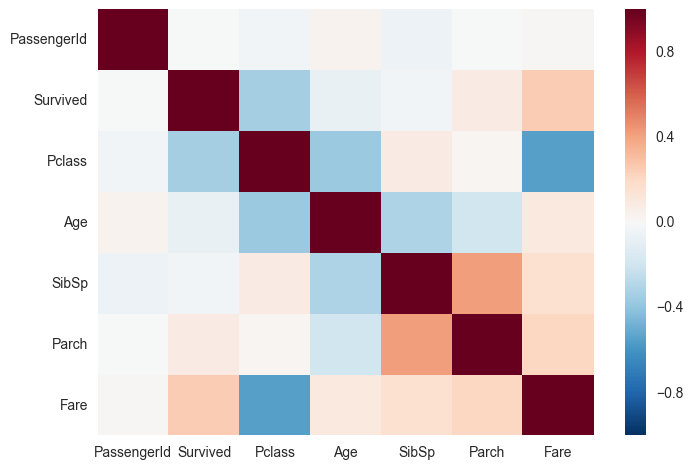

In [5]:
sns.heatmap(train.corr())

In [6]:
train = train.drop(["Name", "Ticket", "Cabin", "PassengerId"], axis=1)

In [7]:
y = train.Survived
X = train.drop("Survived", axis=1)

In [8]:
X = pd.get_dummies(X, columns=["Pclass", "Sex", "Parch", "Embarked"])
X = X.fillna(0)
X['Parch_9'] = [0 for i in range(len(X))]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [10]:
rf = RandomForestClassifier(n_estimators=10)

In [11]:
rf = rf.fit(X_train, y_train)

In [12]:
def show_feature_importance(model, X):
    fi = sorted(zip(X.columns, model.feature_importances_), key=lambda x: x[1], reverse=True)
    fi = pd.DataFrame(fi, columns=["Feature", "Importance"])
    return fi.set_index("Feature").plot(kind="bar")

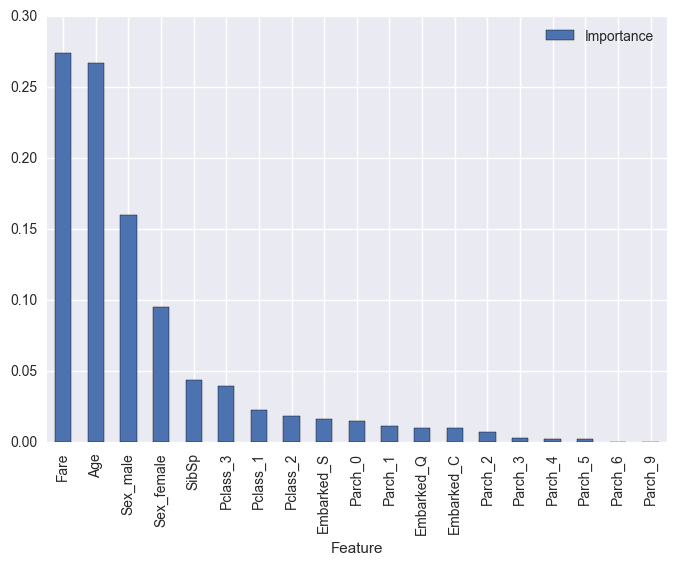

In [13]:
show_feature_importance(rf, X_train)

In [14]:
y_predict = rf.predict(X_test)
confusion_matrix(y_test, y_predict)

array([[128,  19],
       [ 20,  56]])

In [15]:
rf.score(X_test, y_test)

0.82511210762331844

In [16]:
cross_val_score(rf, X, y)

array([ 0.75420875,  0.81144781,  0.79461279])

In [17]:
test = test.drop(["Name", "Ticket", "Cabin", "PassengerId"], axis=1)
test = pd.get_dummies(test, columns=["Pclass", "Sex", "Parch", "Embarked"])
test = test.fillna(0)

In [18]:
test_predict = rf.predict(test)

In [19]:
test_pids = pd.read_table("./data/test.csv", header=0, sep=",", usecols=["PassengerId"])

In [20]:
submission = pd.DataFrame(zip(list(test_pids.PassengerId), list(test_predict)), columns=["PassengerId", "Survived"])

In [21]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [22]:
import os
if not os.path.isdir("predictions"):
    os.mkdir("predictions")
submission.to_csv("./predictions/titanic_predictions.csv", header=True, index=False)